In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
try:
    from ultralytics import YOLO
except:
    !pip install ultralytics
    from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("osmankagankurnaz/facial-feature-extraction-dataset")

print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 24.5M/24.5M [00:02<00:00, 11.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1


['Facial Feature Extraction Dataset']

In [3]:
dataset_path = os.path.join(path, "Facial Feature Extraction Dataset")
os.listdir(dataset_path)

['test', 'valid', 'data.yaml', 'train']

In [4]:
data_yaml = os.path.join(dataset_path, "data.yaml")

In [5]:
class FeatureExtraction():
  def __init__(self,yolo_model):
    self.model = YOLO(yolo_model)

  def train_model(self):

    results = self.model.train(data=data_yaml,epochs=20,imgsz=640,batch=32,device="cuda",pretrained=True,plots=True,cache=True,verbose=True,save=True)

    return results

  def evaluate_model(self,model_path):
    model = YOLO(model_path)
    metrics = model.val()
    return metrics

  def visualize_metrics(self, metrics, result_dir):

        # Create a DataFrame for metrics
        metrics_dict = {
            'Metric': ['Precision', 'Recall', 'mAP50', 'mAP50-95'],
            'Value': [
                metrics.results_dict['metrics/precision(B)'],
                metrics.results_dict['metrics/recall(B)'],
                metrics.results_dict['metrics/mAP50(B)'],
                metrics.results_dict['metrics/mAP50-95(B)']
            ]
        }
        df_metrics = pd.DataFrame(metrics_dict)
        print("\nClass-wise mAP Scores:")
        for class_name, map_score in zip(metrics.names.values(), metrics.maps):
            print(f"{class_name}: {map_score:.3f}")

        img = Image.open(os.path.join(result_dir, "F1_curve.png"))
        plt.figure(figsize=(12, 8))
        plt.axis('off')
        plt.title('F1_curve')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "PR_curve.png"))
        plt.figure(figsize=(12, 8))
        plt.axis('off')
        plt.title('PR_curve')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "P_curve.png"))
        plt.figure(figsize=(12, 8))
        plt.axis('off')
        plt.title('P_curve')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "R_curve.png"))
        plt.figure(figsize=(12, 8))
        plt.axis('off')
        plt.title('R_curve')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "confusion_matrix.png"))
        plt.figure(figsize=(16, 12))
        plt.axis('off')
        plt.title('confusion_matrix')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "confusion_matrix_normalized.png"))
        plt.figure(figsize=(16, 12))
        plt.axis('off')
        plt.title('confusion_matrix_normailized')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "labels.jpg"))
        plt.figure(figsize=(16, 16))
        plt.axis('off')
        plt.title('labels')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "labels_correlogram.jpg"))
        plt.figure(figsize=(16, 16))
        plt.axis('off')
        plt.title('labels_correlogram')
        plt.imshow(img)

        img = Image.open(os.path.join(result_dir, "results.png"))
        plt.figure(figsize=(16, 12))
        plt.axis('off')
        plt.title('results')
        plt.imshow(img)

        plt.show()

In [6]:
print("🚀 Training started...")
print(f"📁 Dataset path: {dataset_path}")

    # Train model
model = FeatureExtraction('yolov8m.pt')
model.train_model()

🚀 Training started...
📁 Dataset path: /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset


100%|██████████| 49.7M/49.7M [00:01<00:00, 46.8MB/s]


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

100%|██████████| 755k/755k [00:00<00:00, 92.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 288MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/train/labels... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<00:00, 1735.69it/s]

train: New cache created: /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 457/457 [00:01<00:00, 261.06it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/valid/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 1681.23it/s]

val: New cache created: /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 126/126 [00:01<00:00, 122.06it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.6G      1.775      3.029      1.791         62        640: 100%|██████████| 15/15 [00:16<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.59s/it]

                   all        126        685      0.919      0.916      0.967      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      13.6G     0.9332     0.8269      1.103         86        640: 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        126        685      0.953      0.955      0.982      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      13.6G     0.8959     0.6455      1.091         85        640: 100%|██████████| 15/15 [00:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        126        685      0.939      0.958      0.973       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      13.6G     0.8936     0.6125      1.094         89        640: 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        126        685      0.835      0.893      0.924      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      13.6G     0.8737     0.5684      1.066         83        640: 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        126        685      0.875      0.797       0.88      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      13.1G     0.8301     0.5499      1.055         76        640: 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        126        685      0.927      0.905      0.969      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      13.5G     0.8509     0.5309      1.059         94        640: 100%|██████████| 15/15 [00:14<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        126        685      0.938      0.947       0.98      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.3G     0.8413     0.5205      1.059         67        640: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        126        685      0.955      0.946      0.983      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.6G     0.8064     0.4978      1.044         84        640: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        126        685      0.968      0.983      0.993      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.2G     0.7998     0.4784      1.043         74        640: 100%|██████████| 15/15 [00:16<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        126        685      0.977      0.989      0.993      0.792


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.5G     0.7271     0.4341     0.9924         48        640: 100%|██████████| 15/15 [00:16<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        126        685       0.98       0.98      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.2G     0.7047     0.4078     0.9913         46        640: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        126        685      0.984      0.993      0.993      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.6G     0.6666     0.3861     0.9724         50        640: 100%|██████████| 15/15 [00:15<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        126        685      0.992       0.99      0.994      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.2G     0.6699     0.3722     0.9741         50        640: 100%|██████████| 15/15 [00:15<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        126        685      0.987       0.99      0.994      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.1G     0.6481      0.364     0.9568         47        640: 100%|██████████| 15/15 [00:15<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        126        685      0.994       0.99      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.2G     0.6502     0.3631     0.9601         51        640: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        126        685       0.99      0.998      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.5G     0.6294     0.3447      0.955         45        640: 100%|██████████| 15/15 [00:15<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        126        685      0.991      0.992      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.2G     0.6065      0.329     0.9366         45        640: 100%|██████████| 15/15 [00:15<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        126        685      0.992      0.994      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.6G     0.5897     0.3164     0.9282         45        640: 100%|██████████| 15/15 [00:15<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        126        685      0.992      0.996      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.2G     0.5647     0.3013      0.914         51        640: 100%|██████████| 15/15 [00:15<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        126        685      0.992      0.997      0.995       0.85



20 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all        126        685      0.993      0.997      0.995       0.85
                   eye        126        138      0.986      0.995      0.995      0.837
               eyebrow        126        144      0.986      0.989      0.994      0.793
                   lip        126        129      0.991          1      0.995       0.89
        mustache-beard        126        146          1          1      0.995      0.858
                  nose        126        128      0.999          1      0.995      0.873
Speed: 0.2ms preprocess, 11.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f189bf1da10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /root/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


                   all        126        685      0.992      0.997      0.995      0.851
                   eye        126        138      0.986      0.995      0.995       0.84
               eyebrow        126        144      0.986      0.989      0.994      0.792
                   lip        126        129      0.991          1      0.995      0.892
        mustache-beard        126        146      0.999          1      0.995      0.857
                  nose        126        128      0.999          1      0.995      0.875
Speed: 0.8ms preprocess, 22.8ms inference, 0.1ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val

✨ Training completed!
💾 Best model saved at: runs/detect/train/weights/best.pt

📊 Model Performance Summary:
Precision: 0.992
Recall: 0.997
mAP50: 0.995
mAP50-95: 0.851

Class-wise mAP Scores:
eye: 0.840
eyebrow: 0.792
lip: 0.892
mustache-beard: 0.857
nose: 0.875


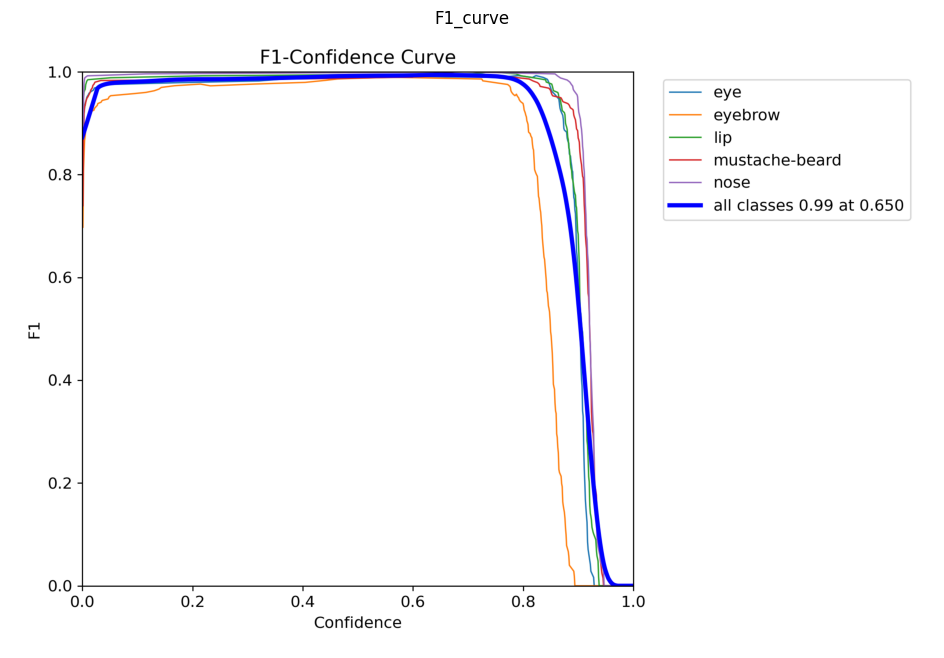

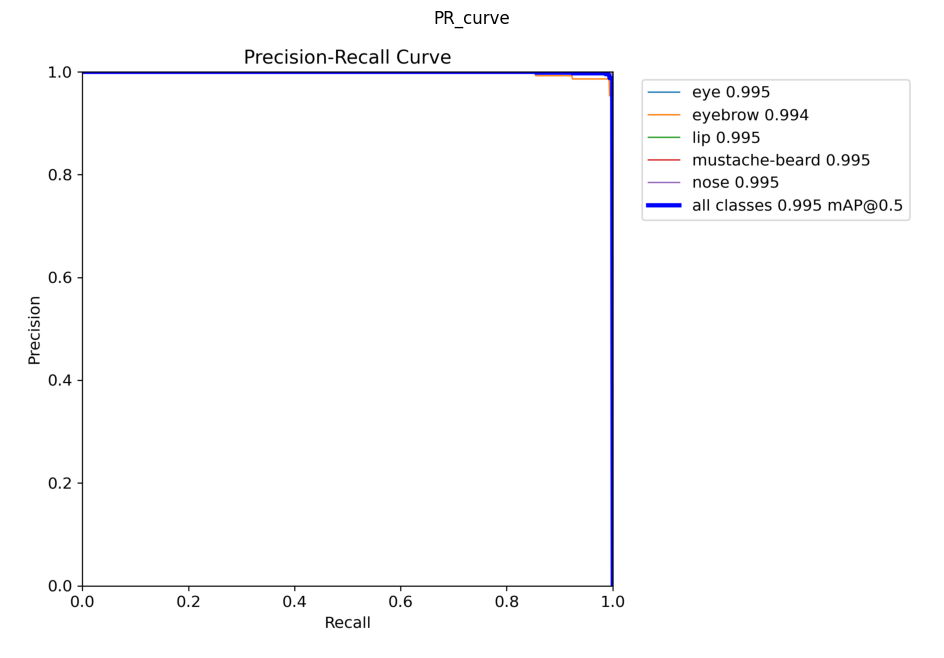

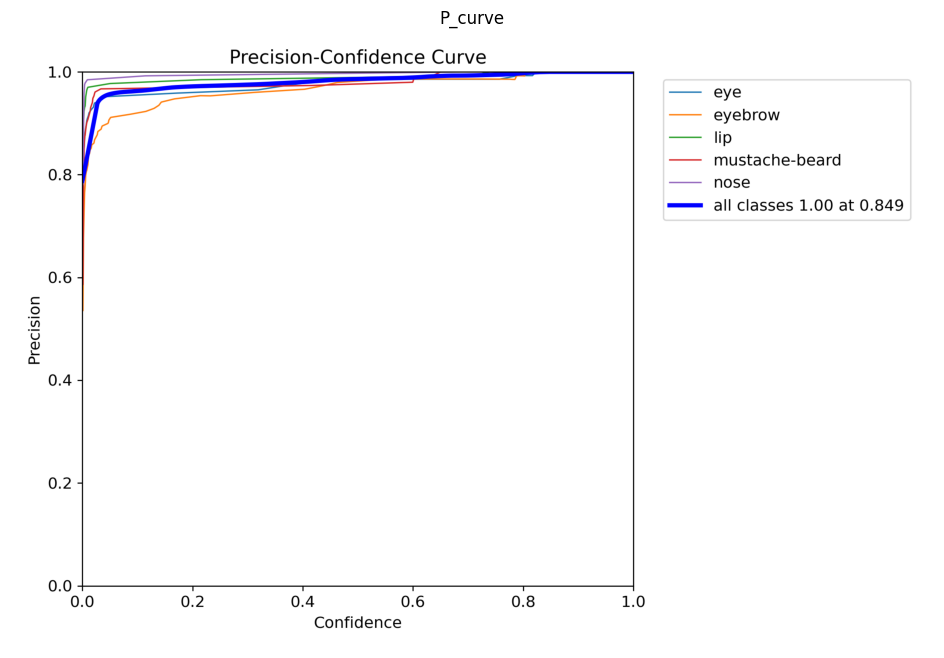

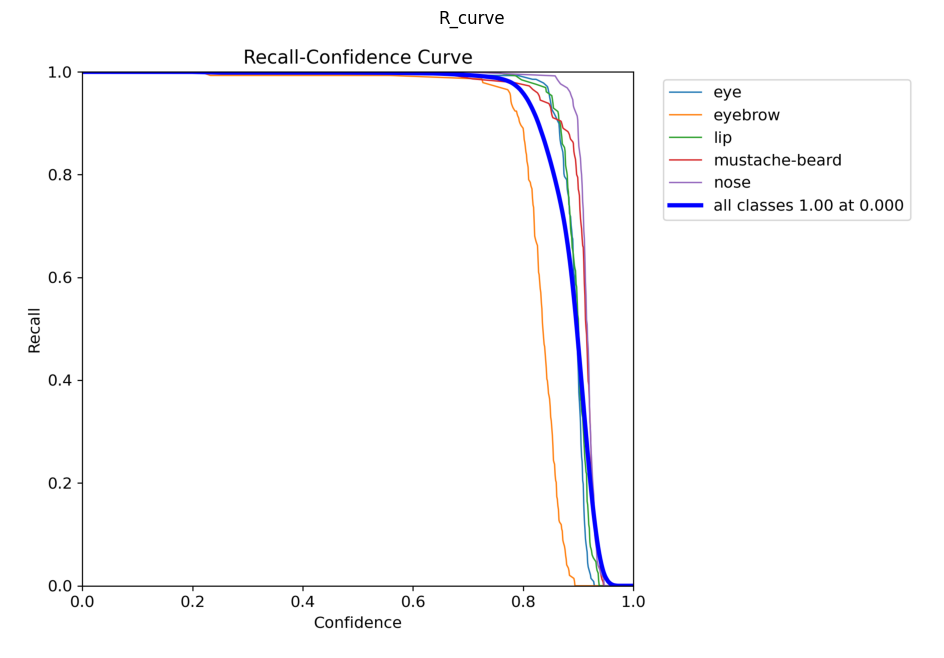

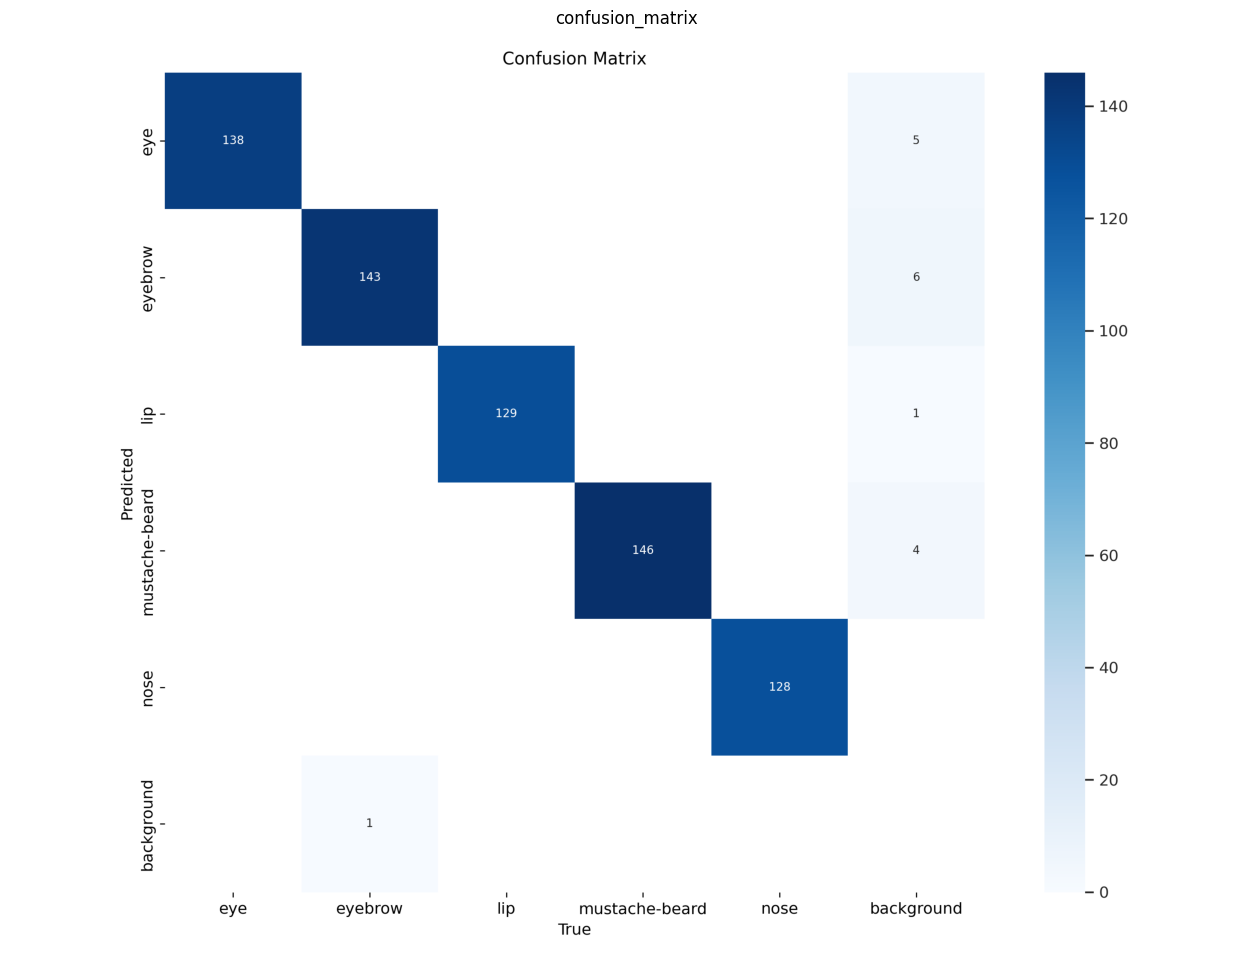

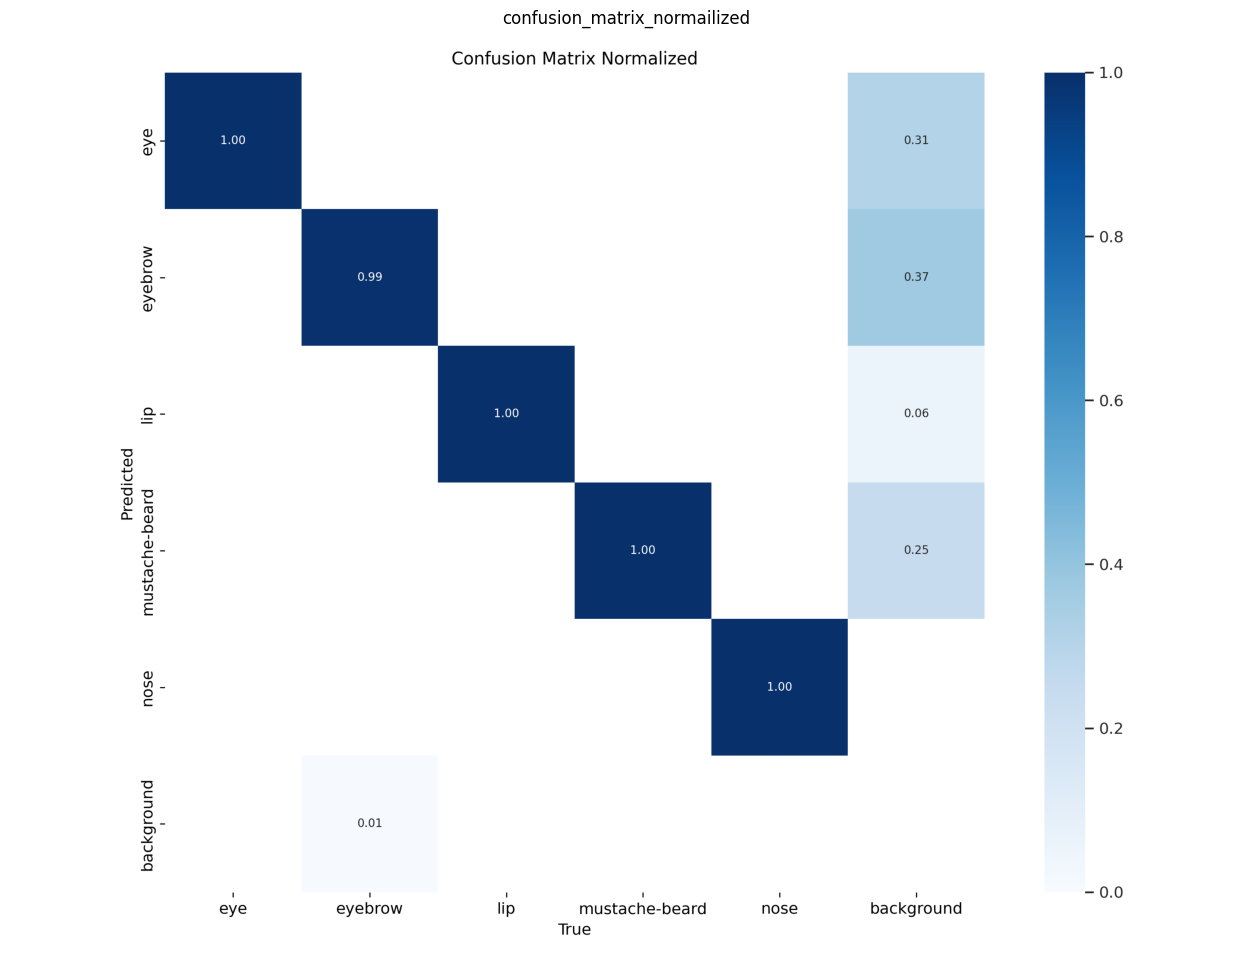

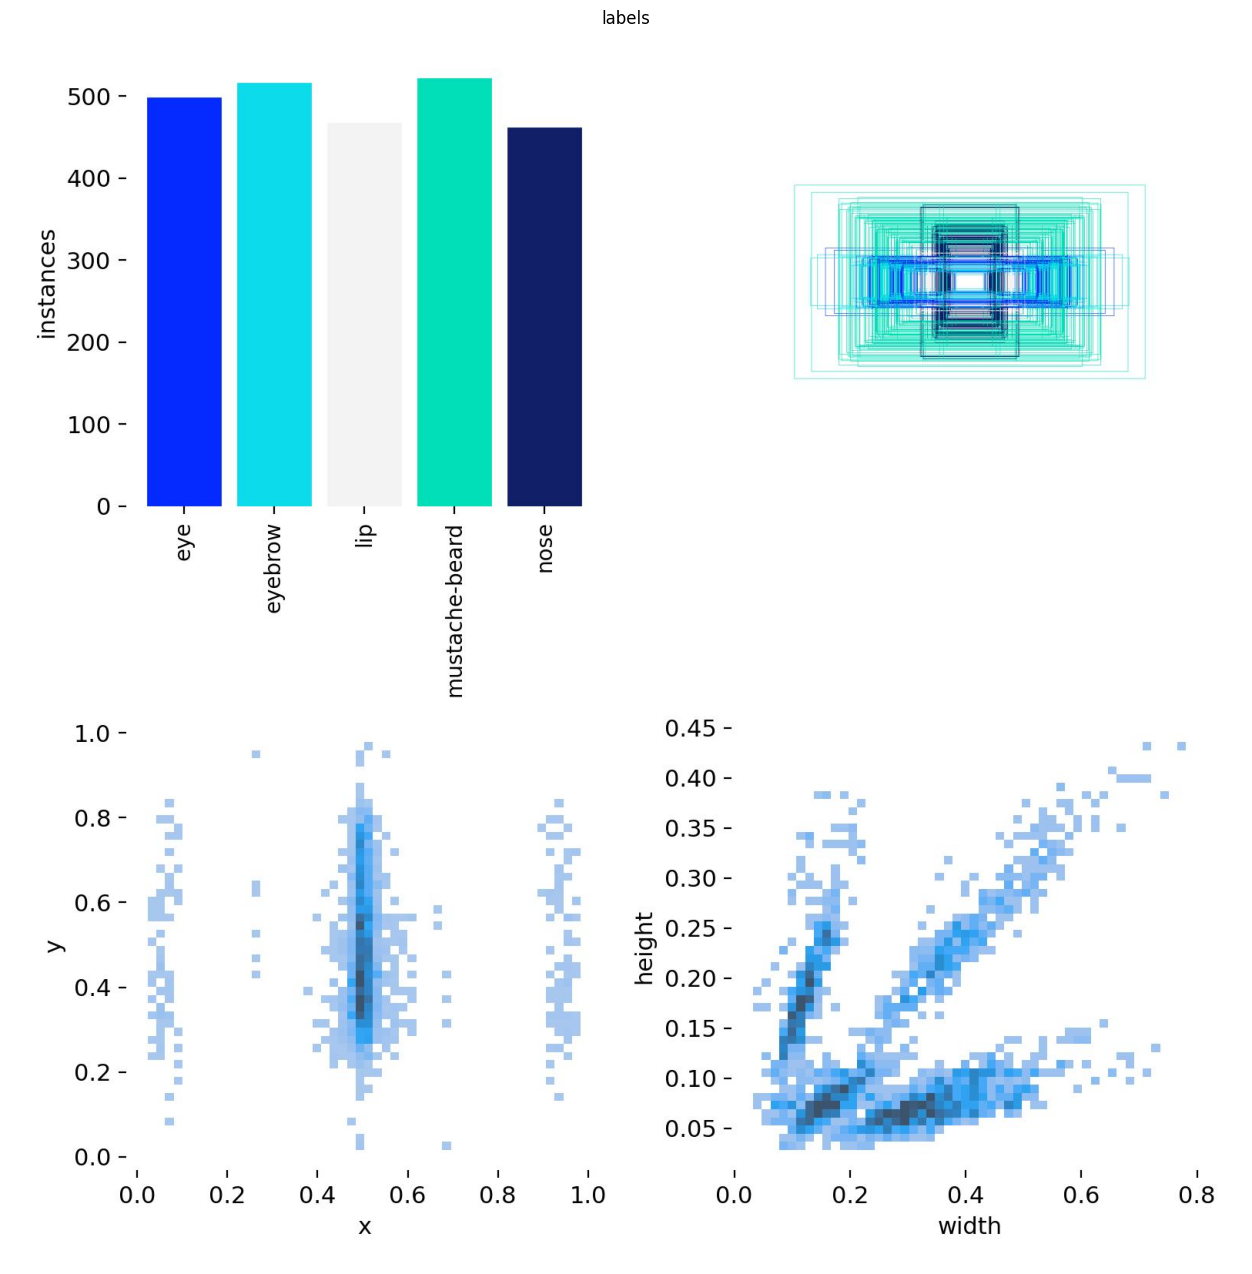

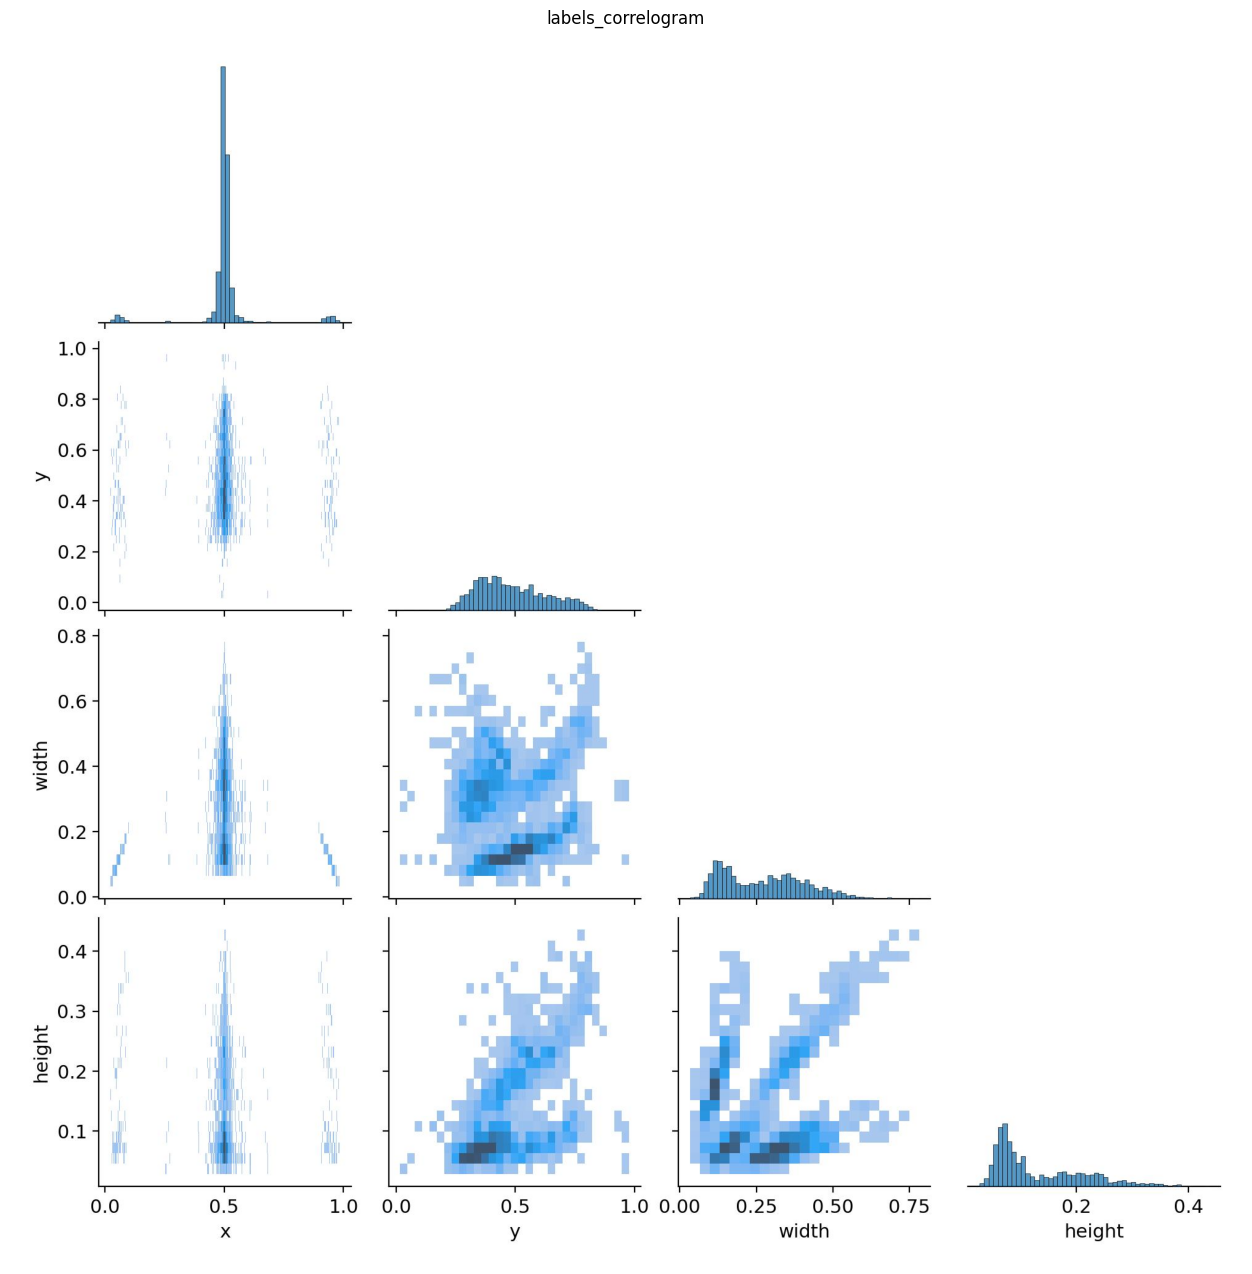

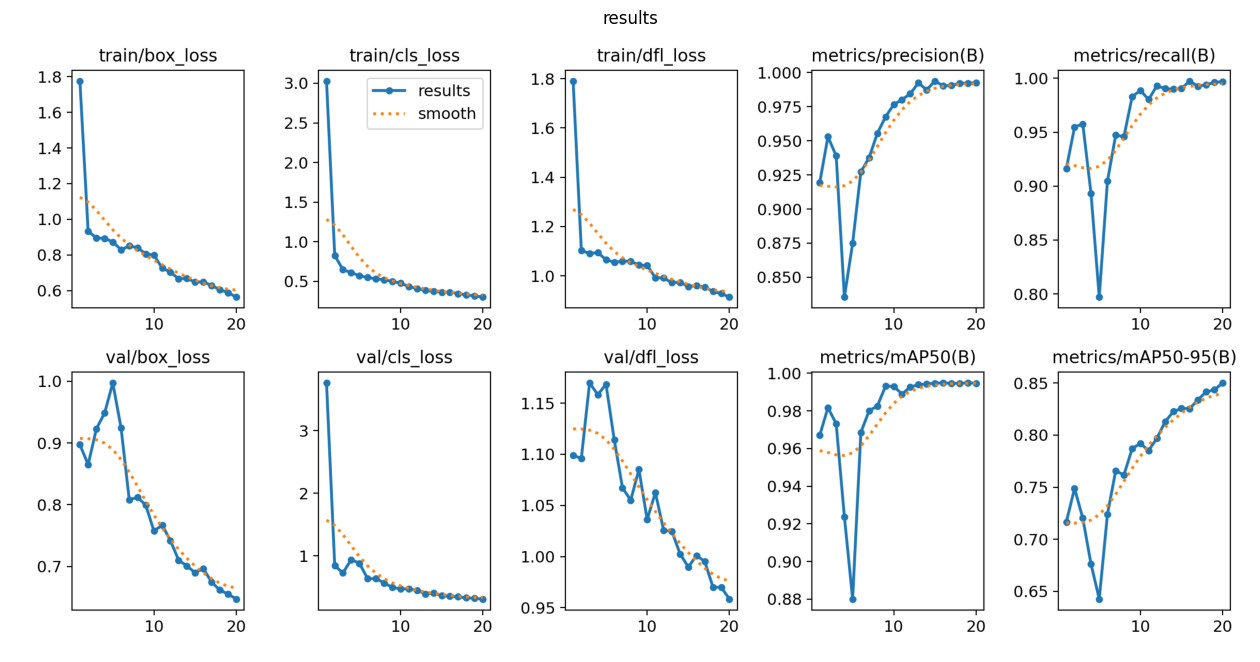

In [7]:
# Evaluate best model
best_model_path = f'runs/detect/train/weights/best.pt'
best_model_dir = f'runs/detect/train/'
metrics = model.evaluate_model(best_model_path)

print("\n✨ Training completed!")
print(f"💾 Best model saved at: {best_model_path}")

print("\n📊 Model Performance Summary:")
print("=" * 50)
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.3f}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.3f}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']:.3f}")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.3f}")
print("=" * 50)

model.visualize_metrics(metrics, best_model_dir)

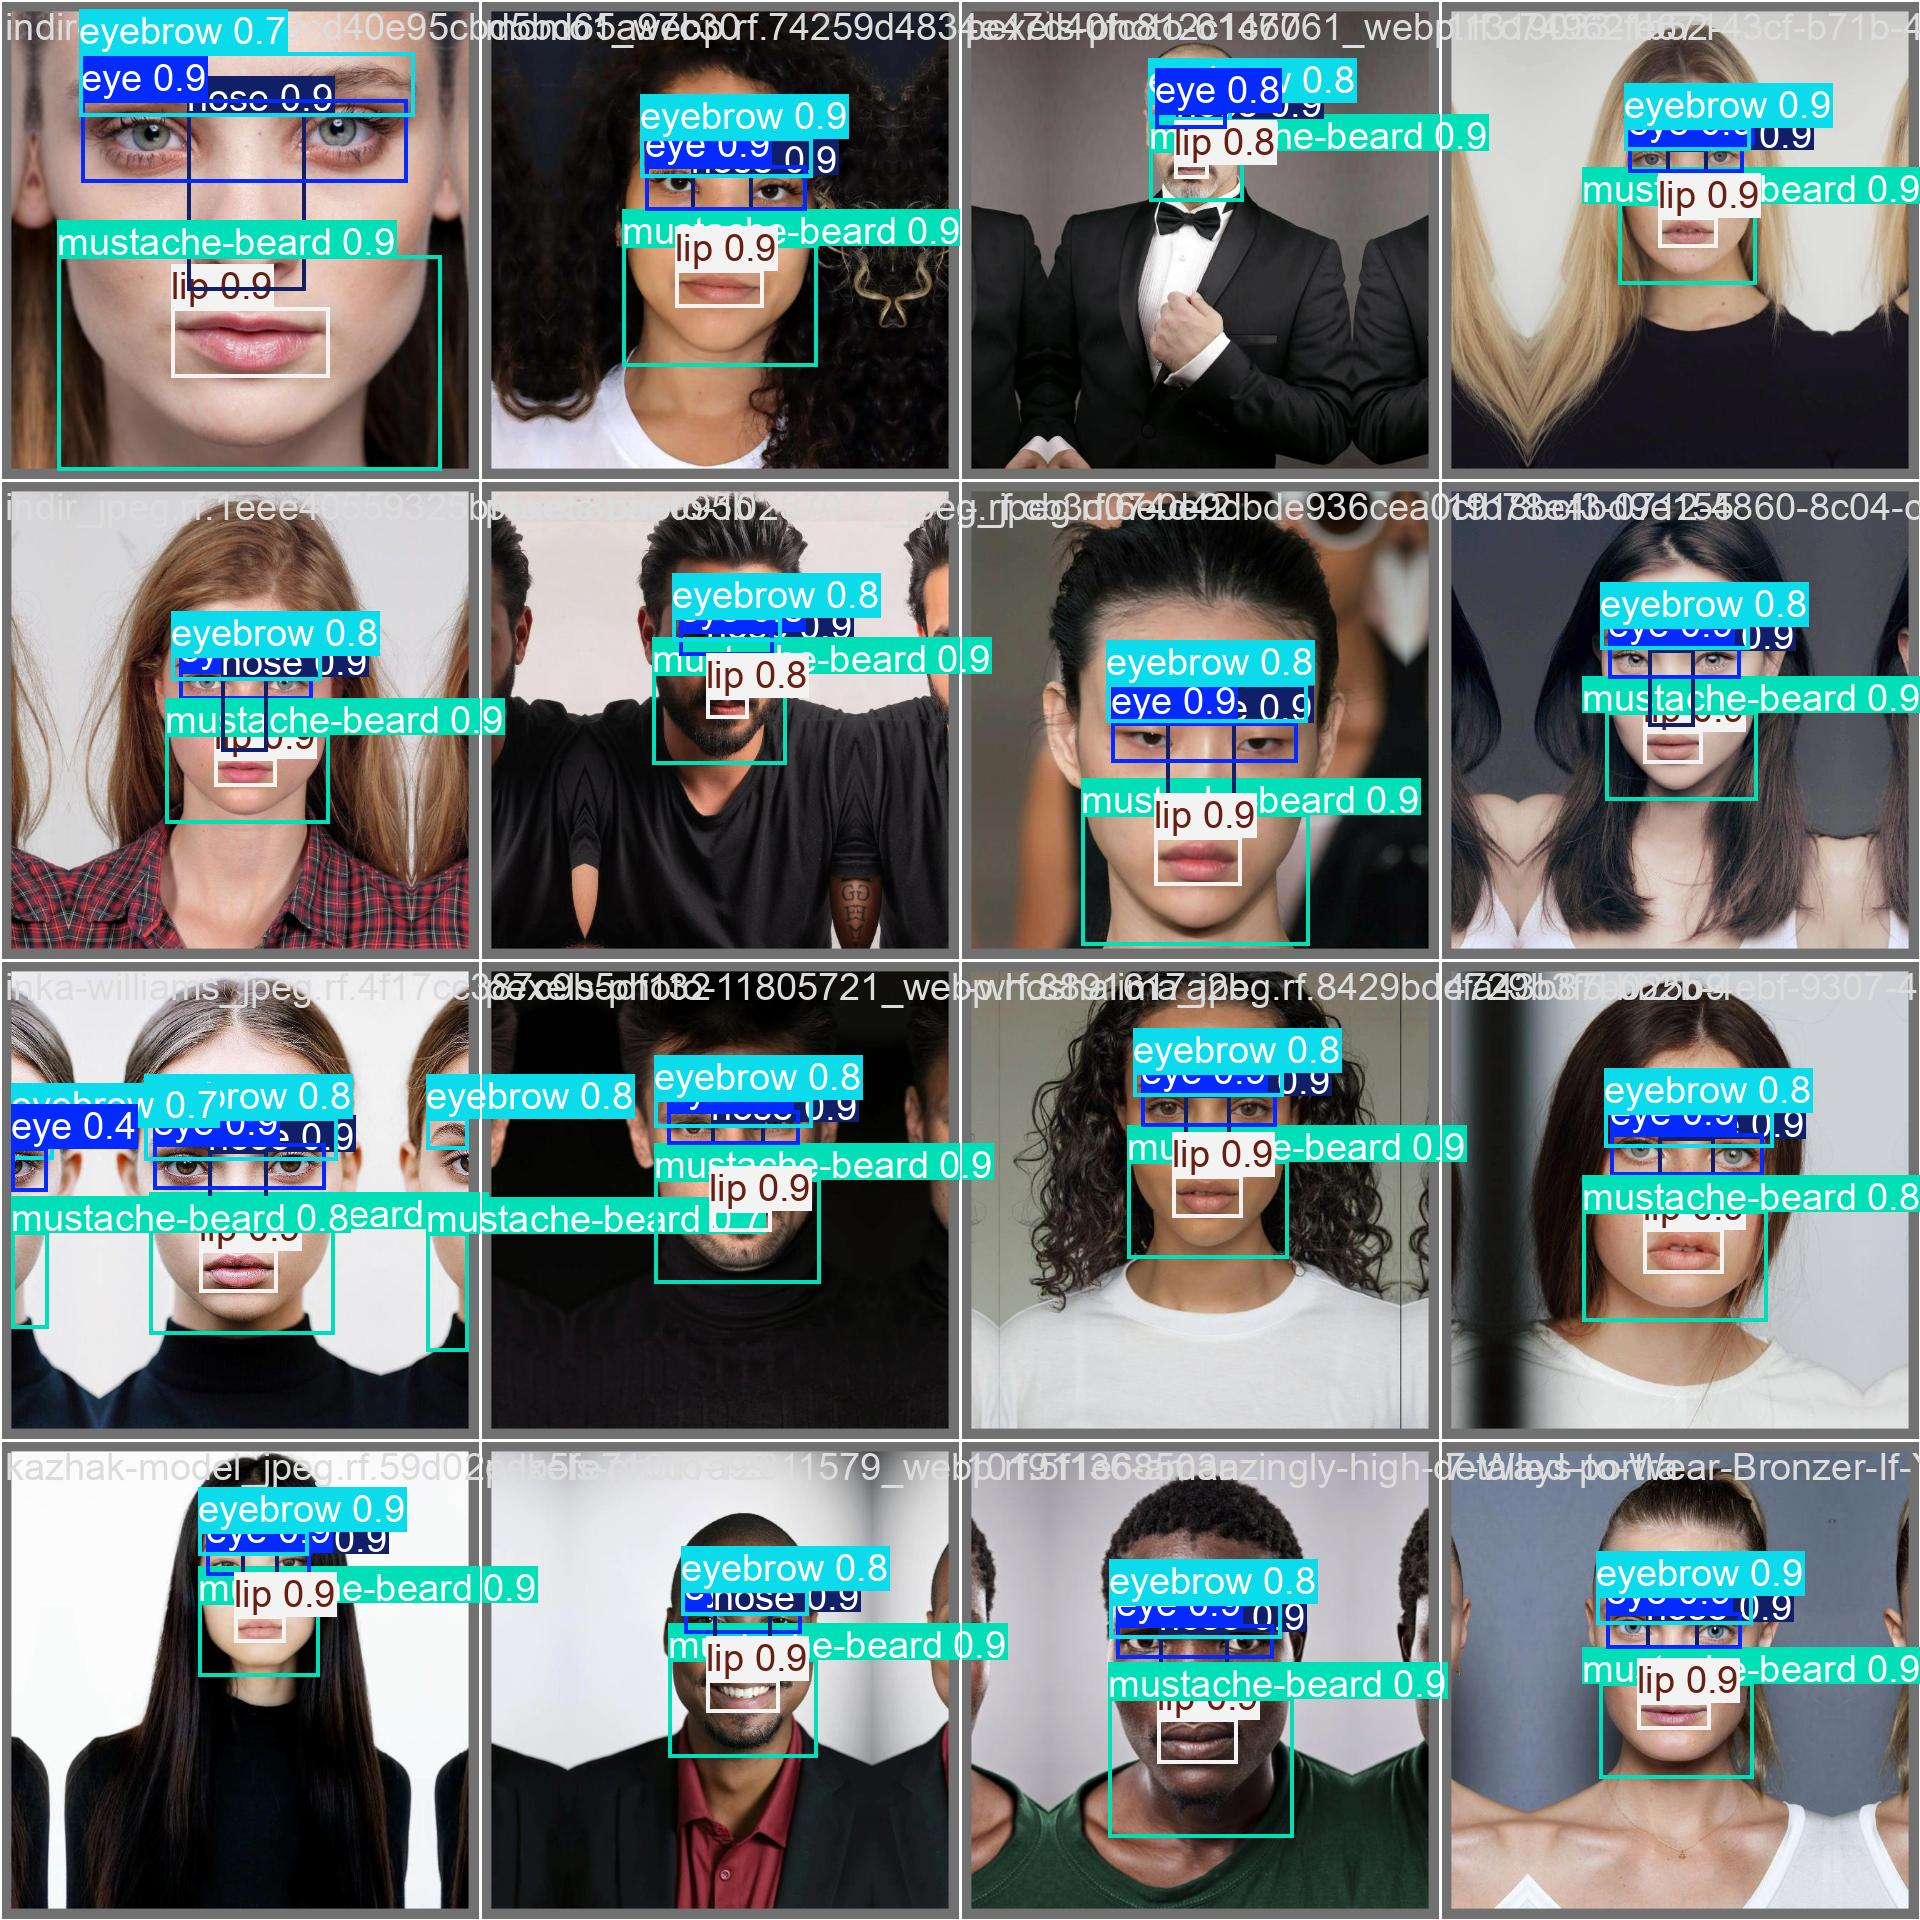

In [8]:
result_dir = f"runs/detect/train"
Image.open(os.path.join(result_dir, 'val_batch0_pred.jpg'))

In [9]:
def predict_image(image):
  model = YOLO(best_model_path)
  result = model(image)
  plt.figure(figsize=(10,15))
  plt.axis('off')
  plt.imshow(result[0].plot())
  plt.show()

In [10]:
import cv2
def process_image(image_path):
  cv2_img = cv2.imread(image_path)
  cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
  return cv2_img


0: 640x384 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 80.9ms
Speed: 3.8ms preprocess, 80.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)


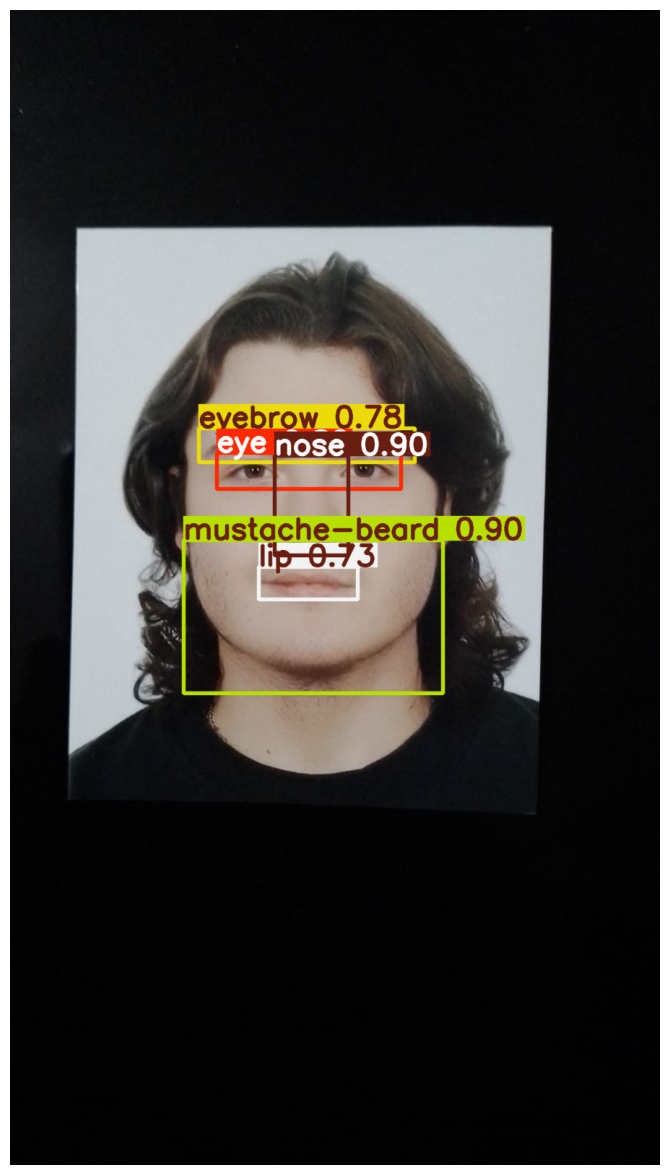

In [11]:
predict_image(process_image("/content/WhatsApp Image 2025-01-31 at 19.03.59_37e30c51.jpg"))